In [ ]:
pip uninstall spacy

In [2]:
# Import libraries

import pandas as pd
    import numpy as np
import torch
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
import re
import emoji
import contractions
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import  Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import torch 

reviews_dataset_path = 'IMDB Dataset.csv'

# Load Bahasa Indonesia reviews dataset



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\ProgramData\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [3]:
df = pd.read_csv(reviews_dataset_path)


df_head = df.head()

df_info = df.info()
df_desc = df.describe()

df_head, df_info,df_desc

NameError: name 'pd' is not defined

<Axes: xlabel='sentiment'>

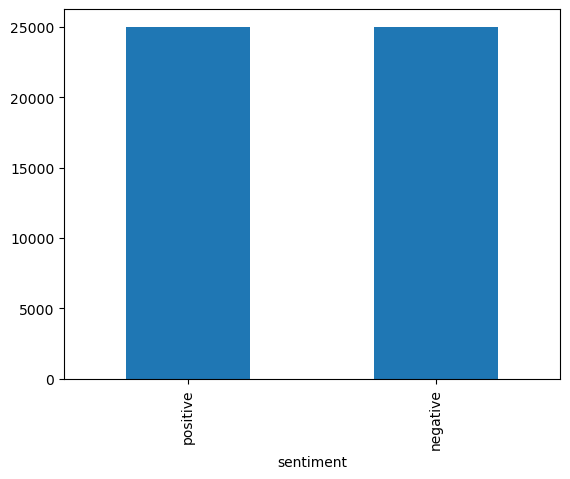

In [36]:
# Check for duplicates
df[df['sentiment'].duplicated()]
df.sentiment.value_counts().plot(kind='bar')

In [37]:
nlp = spacy.load('en_core_web_sm')
stopwords_list = stopwords.words('english')

# Define function to clear data 
def clean_lemmatize(text):
    # Decode emojis
    text = emoji.demojize(text)
    # Decode contractions
    text = contractions.fix(text)
    # Remove web links and html tags
    text = re.sub(r'https?://(www\.)?[\w-]+(\.[a-zA-Z]+)+|<.*?>|[^a-zA-Z\s]', ' ', text)
    # Remove whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Convert text to lower
    text = text.lower()
    # Convert text to tokens
    tokens = word_tokenize(text)
    # Remove stopwords and words longer than 1
    tokens = [word for word in tokens if word not in stopwords_list and len(word) > 1]
    words = nlp(" ".join(tokens))
    text = [word.lemma_ for word in words]
    return ' '.join(text)

NameError: name 'spacy' is not defined

In [3]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    words = text.split()
    filtered_sentence = ''
    for word in words:
        if word not in stop_words:
            filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence

def normalize_text(text):
    text = text.lower()
    # get rid of urls
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # get rid of non words and extra spaces
    text = re.sub('\\W', ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('^ ', '', text)
    text = re.sub(' $', '', text)
    return text

def remove_punctuation(text):
    table = str.maketrans('','',string.punctuation)
    words = text.split()
    filtered_sentence = ''
    for word in words:
        word = word.translate(table)
        filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence

def stemming(text):
    ps = PorterStemmer()
    words = text.split()
    filtered_sentence = ''
    for word in words:
        word = ps.stem(word)
        filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence

def clean_text(text):
    text = text.lower()
    text = text.replace(',',' , ')
    text = text.replace('.',' . ')
    text = text.replace('/',' / ')
    text = text.replace('@',' @ ')
    text = text.replace('#',' # ')
    text = text.replace('?',' ? ')
    text = normalize_text(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = stemming(text)
    return text

<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Pixiedust\AppData\Local\Temp\ipykernel_13660\1466835580.py:13: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)


In [4]:
X = df["review"]
y = df['sentiment']

one = OneHotEncoder()
y = one.fit_transform(np.asarray(y).reshape(-1,1)).toarray()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   shuffle=True)

In [6]:
# important properties
vocab_size = 10000
max_length = 50

trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

# Define tokenizer and fit on texts
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)



In [7]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=max_length,
                         padding=padding_type,
                         truncating=trunc_type)
X_test = pad_sequences(X_test, maxlen=max_length,
                         padding=padding_type,
                         truncating=trunc_type)

In [25]:
def build_model():
    model = Sequential()

    model.add(Embedding(vocab_size, 64, input_length=max_length))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))  # Add dropout regularization

    model.add(LSTM(32, return_sequences=True))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))  # Add dropout regularization

    model.add(LSTM(32))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))  # Add dropout regularization
    
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Apply early stopping

    return model, early_stopping

